In [211]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [212]:
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
#df_test.head()
def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [213]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

<AxesSubplot:>

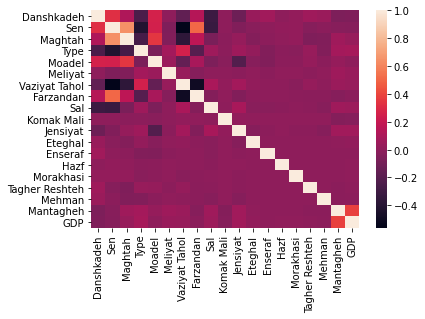

In [215]:
sns.heatmap(df_test.corr(), annot=False)


In [216]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
Mantagheh         0
GDP               0
dtype: int64

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'Mantagheh', 'GDP']


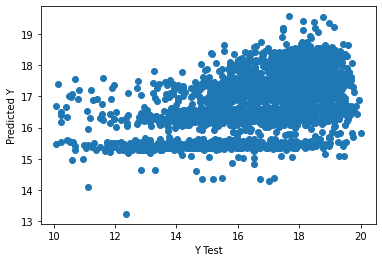

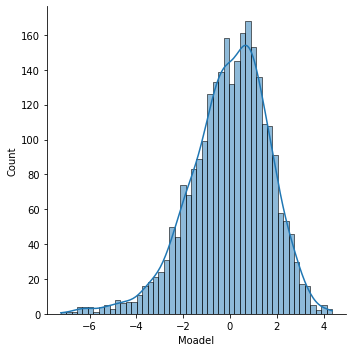

In [217]:
X = df_test.drop(['Moadel'], axis=1) 
#X = df_test[['Leave', 'Remove']]
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

sns.displot((y_test-predictions),bins=50, kde=True);

In [218]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Danshkadeh,1.037870
Sen,-0.645342
Maghtah,2.137230
Type,0.335020
Meliyat,0.970664
Vaziyat Tahol,0.040465
Farzandan,0.940894
Sal,0.258722
Komak Mali,-0.390285
Jensiyat,-0.835886


In [219]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3122378301887818
MSE: 2.811726456553451
RMSE: 1.6768203411676075


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose=False)

<AxesSubplot:>

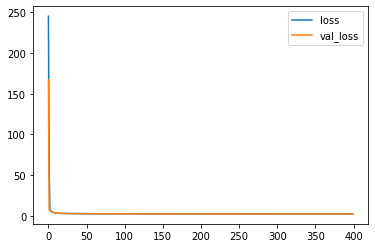

In [221]:
losses = pd.DataFrame(model.history.history)
losses.plot()

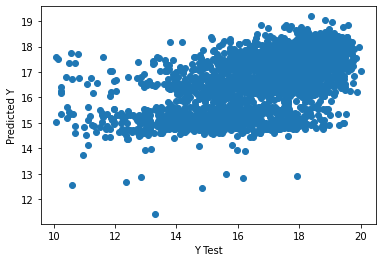

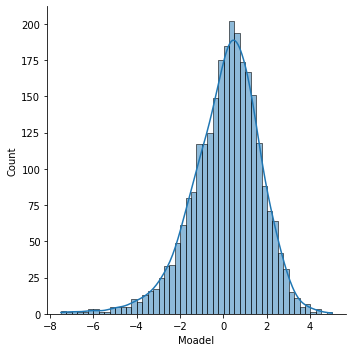

In [222]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')
sns.displot((y_test-predictions),bins=50, kde=True);

<AxesSubplot:>

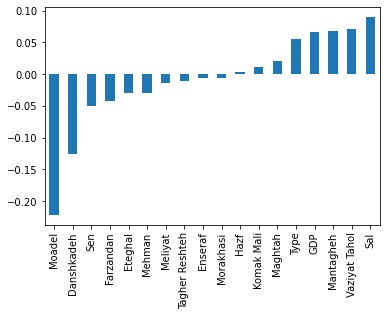

In [223]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

In [224]:
X = df_test.drop(['Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'Mantagheh', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6366691560866318
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1104
           1       0.65      0.82      0.73      1574

    accuracy                           0.64      2678
   macro avg       0.62      0.60      0.59      2678
weighted avg       0.63      0.64      0.62      2678

0.6366691560866318
0.6494585511575803


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])
#model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
335/335 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5848 - val_loss: 0.6780 - val_accuracy: 0.5721
Epoch 2/300
335/335 [==============================] - 1s 2ms/step - loss: 0.6551 - accuracy: 0.6257 - val_loss: 0.6660 - val_accuracy: 0.5926
Epoch 3/300
335/335 [==============================] - 1s 2ms/step - loss: 0.6497 - accuracy: 0.6267 - val_loss: 0.6518 - val_accuracy: 0.6225
Epoch 4/300
335/335 [==============================] - 0s 948us/step - loss: 0.6438 - accuracy: 0.6300 - val_loss: 0.6534 - val_accuracy: 0.6299
Epoch 5/300
335/335 [==============================] - 0s 965us/step - loss: 0.6413 - accuracy: 0.6388 - val_loss: 0.6449 - val_accuracy: 0.6318
Epoch 6/300
335/335 [==============================] - 0s 955us/step - loss: 0.6415 - accuracy: 0.6407 - val_loss: 0.6496 - val_accuracy: 0.6329
Epoch 7/300
335/335 [==============================] - 0s 927us/step - loss: 0.6383 - accuracy: 0.6416 - val_loss: 0.6670 - val_accuracy

<AxesSubplot:>

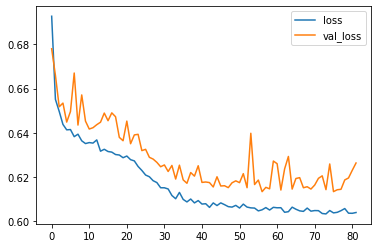

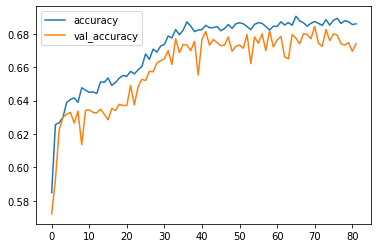

In [226]:
model_loss = pd.DataFrame(model.history.history)
loss = model_loss[['loss', 'val_loss']]
acc = model_loss[['accuracy', 'val_accuracy']]
loss.plot()
acc.plot()

In [227]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1104
           1       0.68      0.84      0.75      1574

    accuracy                           0.67      2678
   macro avg       0.67      0.64      0.64      2678
weighted avg       0.67      0.67      0.66      2678

[[ 475  629]
 [ 244 1330]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '


In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1104
           1       0.65      0.66      0.65      1574

    accuracy                           0.59      2678
   macro avg       0.58      0.58      0.58      2678
weighted avg       0.59      0.59      0.59      2678

[[ 545  559]
 [ 539 1035]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1104
           1       0.68      0.71      0.69      1574

    accuracy                           0.63      2678
   macro avg       0.62      0.61      0.61      2678
weighted avg       0.63      0.63      0.63      2678

[[ 567  537]
 [ 453 1121]]
